In [70]:
import pandas as pd 

df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission 4.csv")
df.head(5)

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,Acer,Intel Core i5,16,256,17.3,macOS,1808.865225
1,Acer,Intel Core i7,32,2048,13.3,macOS,2020.923055
2,Apple,AMD Ryzen 5,32,512,17.3,Linux,1152.453189
3,HP,AMD Ryzen 5,8,512,15.6,macOS,1884.457406
4,Lenovo,AMD Ryzen 7,64,256,17.3,macOS,2780.779164


In [32]:
df.isna().sum()

Brand                   0
Processor Type          0
RAM Size (GB)           0
Storage (GB)            0
Screen Size (inches)    0
Operating System        0
Price ($)               0
dtype: int64

In [33]:
df.nunique()

Brand                     5
Processor Type            4
RAM Size (GB)             4
Storage (GB)              4
Screen Size (inches)      4
Operating System          3
Price ($)               996
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 1000 non-null   object 
 1   Processor Type        1000 non-null   object 
 2   RAM Size (GB)         1000 non-null   int64  
 3   Storage (GB)          1000 non-null   int64  
 4   Screen Size (inches)  1000 non-null   float64
 5   Operating System      1000 non-null   object 
 6   Price ($)             1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder

le = {}
le_cols = ['Brand', 'Processor Type', 'Operating System']

for col in le_cols:
    le[col] = LabelEncoder()
    df[col] = le[col].fit_transform(df[col])

df    

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,0,2,16,256,17.3,2,1808.865225
1,0,3,32,2048,13.3,2,2020.923055
2,1,0,32,512,17.3,0,1152.453189
3,3,0,8,512,15.6,2,1884.457406
4,4,1,64,256,17.3,2,2780.779164
...,...,...,...,...,...,...,...
995,4,2,8,512,15.6,0,941.038821
996,2,2,32,2048,15.6,1,1157.272102
997,3,0,64,1024,15.6,2,1826.347859
998,0,0,32,2048,15.6,0,1315.125592


In [36]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc_cols = ['RAM Size (GB)', 'Storage (GB)', 'Screen Size (inches)']
df[sc_cols] = sc.fit_transform(df[sc_cols])
df.head(5)

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
0,0,2,0.142857,0.000000,1.000,2,1808.865225
1,0,3,0.428571,1.000000,0.000,2,2020.923055
2,1,0,0.428571,0.142857,1.000,0,1152.453189
3,3,0,0.000000,0.142857,0.575,2,1884.457406
4,4,1,1.000000,0.000000,1.000,2,2780.779164


In [37]:
df.describe()

,Brand,Processor Type,RAM Size (GB),Storage (GB),Screen Size (inches),Operating System,Price ($)
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.89000,1.340000,0.396286,0.403143,0.447675,1.120000,1752.871053
std,1.36373,1.116085,0.387938,0.393932,0.390830,0.816251,671.389528
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,389.808247
25%,1.00000,0.000000,0.107143,0.142857,0.000000,0.000000,1233.948071
50%,2.00000,1.000000,0.142857,0.142857,0.575000,1.000000,1738.449367
75%,3.00000,2.000000,1.000000,1.000000,1.000000,2.000000,2215.303742
max,4.00000,3.000000,1.000000,1.000000,1.000000,2.000000,3117.210896


Text(0.5, 1.0, 'Dist')

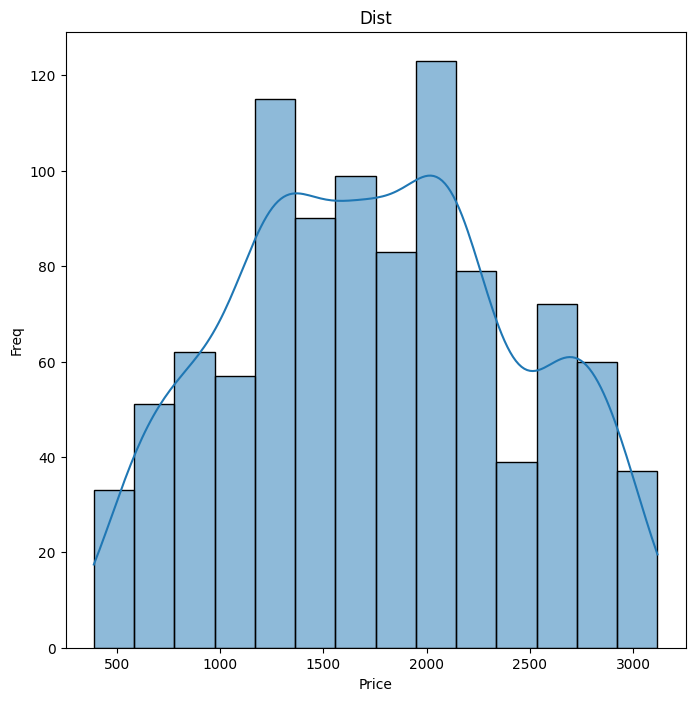

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,8))
sns.histplot(df['Price ($)'], kde=True)
plt.xlabel('Price')
plt.ylabel('Freq')
plt.title('Dist')

Text(0.5, 1.0, 'Rel')

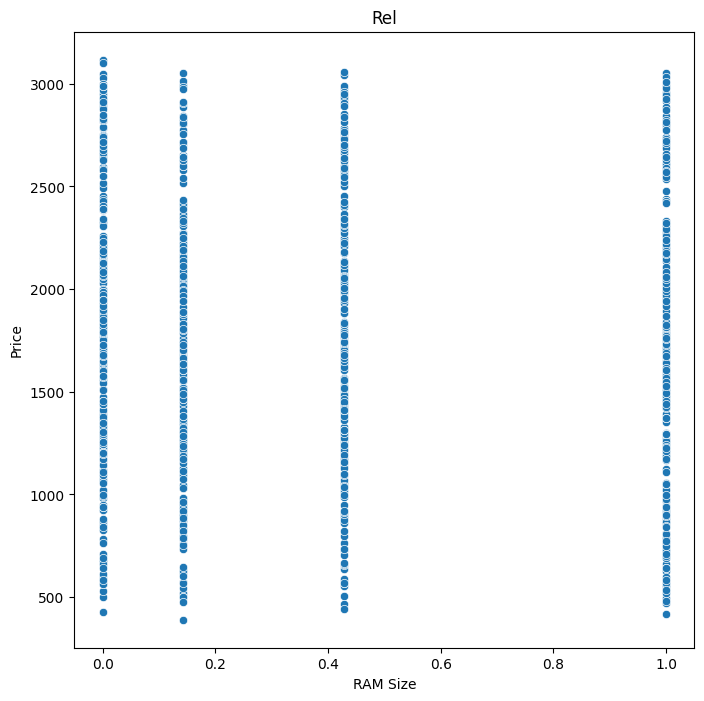

In [39]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x = 'RAM Size (GB)', y = 'Price ($)')
plt.xlabel('RAM Size')
plt.ylabel('Price')
plt.title('Rel')

Text(0.5, 1.0, 'Imp')

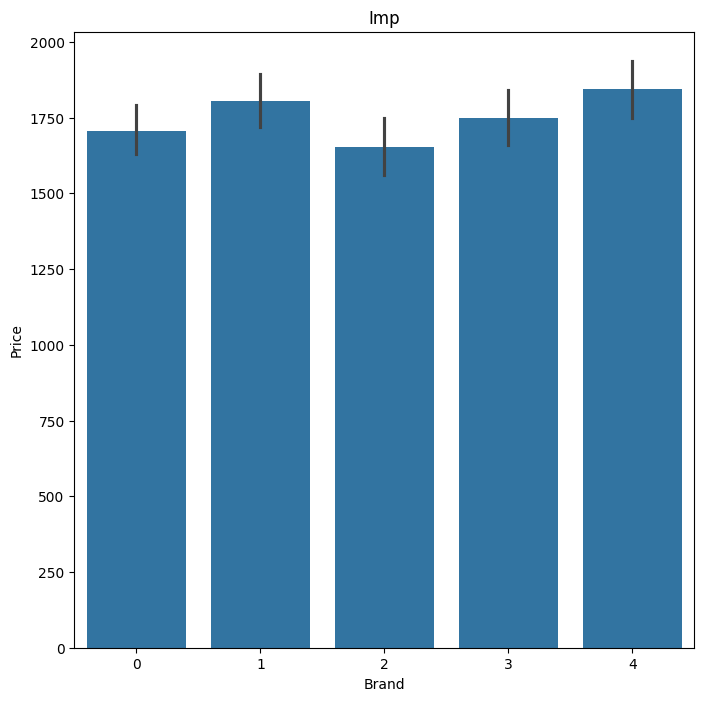

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x = 'Brand', y = 'Price ($)')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Imp')

In [41]:
x = df.drop('Price ($)' , axis = 1)
y = df['Price ($)']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [44]:
lr.fit(x_train , y_train)
dt.fit(x_train , y_train)
rf.fit(x_train , y_train)

RandomForestRegressor()

In [45]:
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE for lr model is: ' , mean_absolute_error(y_test , y_pred_lr))
print('MAE for dt model is: ' , mean_absolute_error(y_test , y_pred_dt))
print('MAE for rf model is: ' , mean_absolute_error(y_test , y_pred_rf))
print('-'*40)
print('MSE for lr model is: ' , mean_squared_error(y_test , y_pred_lr))
print('MSE for dt model is: ' , mean_squared_error(y_test , y_pred_dt))
print('MSE for rf model is: ' , mean_squared_error(y_test , y_pred_rf))
print('-'*40)
print('R2 for lr model is: ' , r2_score(y_test , y_pred_lr))
print('R2 for dt model is: ' , r2_score(y_test , y_pred_dt))
print('R2 for rf model is: ' , r2_score(y_test , y_pred_rf))

MAE for lr model is:  566.2744459316656
MAE for dt model is:  507.5029963594924
MAE for rf model is:  459.9269955795404
----------------------------------------
MSE for lr model is:  459090.8989545152
MSE for dt model is:  587960.5611985363
MSE for rf model is:  375603.9825248036
----------------------------------------
R2 for lr model is:  0.05026750906647026
R2 for dt model is:  -0.21632829060522574
R2 for rf model is:  0.22297892042687106


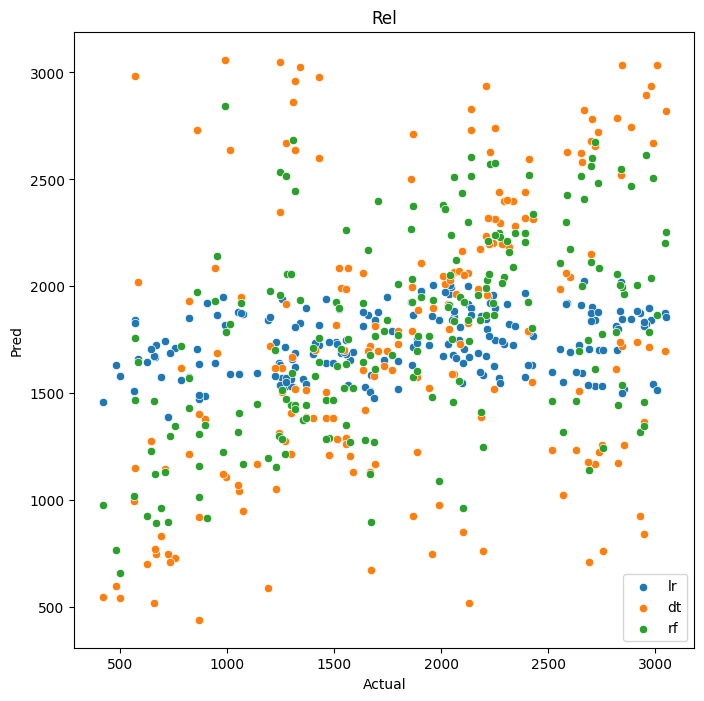

In [51]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_lr, label = 'lr')
sns.scatterplot(x = y_test, y = y_pred_dt, label = 'dt')
sns.scatterplot(x = y_test, y = y_pred_rf, label = 'rf')
plt.xlabel('Actual')
plt.ylabel('Pred')
plt.title('Rel')
plt.legend()

In [53]:
from sklearn.model_selection import RandomizedSearchCV

rand_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'n_estimators' : [100, 200, 300, 400, 500]
}

rand_model = RandomizedSearchCV(rf, rand_params, cv=5)
rand_model.fit(x_train , y_train)
print('best params: ', rand_model.best_params_)

best params:  {'n_estimators': 400, 'max_depth': 10}


In [54]:
y_pred_rand = rand_model.best_estimator_.predict(x_test)

print('MAE for rand model is: ' , mean_absolute_error(y_test , y_pred_rand))
print('MSE for rand model is: ' , mean_squared_error(y_test , y_pred_rand))
print('R2 for rand model is: ' , r2_score(y_test , y_pred_rand))

MAE for rand model is:  460.77552271524024
MSE for rand model is:  368768.22178776225
R2 for rand model is:  0.2371202246587789


In [55]:
x.columns

Index(['Brand', 'Processor Type', 'RAM Size (GB)', 'Storage (GB)',
       'Screen Size (inches)', 'Operating System'],
      dtype='object')

In [62]:
df.nunique()

Brand                     5
Processor Type            4
RAM Size (GB)             4
Storage (GB)              4
Screen Size (inches)      4
Operating System          3
Price ($)               996
dtype: int64

In [73]:
import gradio as gr 

def pred_lap_price(Brand, Processor_Type, RAM, Storage, Screen, OS):
    input_data = pd.DataFrame({
        'Brand' : [Brand],
        'Processor Type' : [Processor_Type],
        'RAM Size (GB)' : [RAM],
        'Storage (GB)' : [Storage],
        'Screen Size (inches)' : [Screen],
        'Operating System' : [OS]
    })
    
    for col in le_cols:
        input_data[col] = le[col].transform(input_data[col])
        
    input_data[sc_cols] = sc.transform(input_data[sc_cols])    
    
    prediction = rand_model.best_estimator_.predict(input_data)
    return f'${prediction[0]:,.2f}'

gr.Interface(
    fn = pred_lap_price,
    inputs=[
        gr.Dropdown(choices= list(df['Brand'].unique()) , label='Brand'),
        gr.Dropdown(choices= list(df['Processor Type'].unique()) , label='Processor Type'),
        gr.Number(label='RAM Size (GB)'),
        gr.Number(label='Storage (GB)'),
        gr.Number(label='Screen Size (inches)'),
        gr.Dropdown(choices= list(df['Operating System'].unique()) , label='Operating System')
    ],
    
    outputs= gr.Textbox(label='The pred price is: '),
    title= 'Pred lap price'
).launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
